# LOAN ELIGIBLITY PREDICTION

Source: https://www.kaggle.com/code/syedali110/loan-eligiblity-prediction/notebook

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df_train=pd.read_csv('../data/raw/loan-train_original.csv')
df_test=pd.read_csv('../data/raw/loan-test_original.csv')

In [3]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


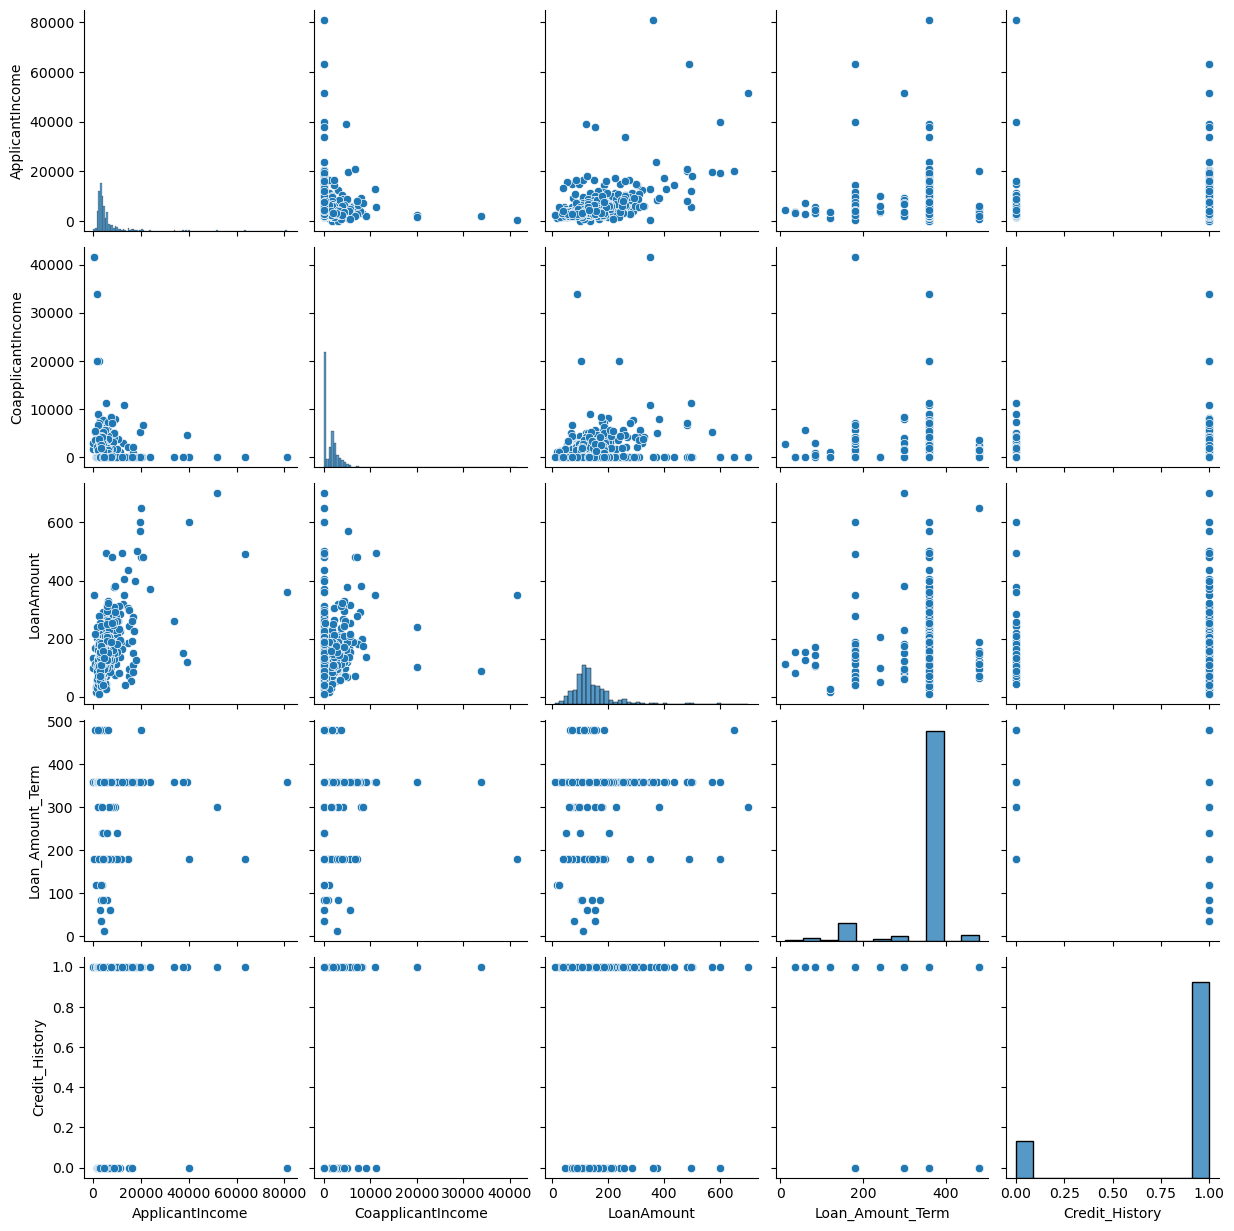

In [8]:
sns.pairplot(df_train)

<Axes: xlabel='Gender', ylabel='count'>

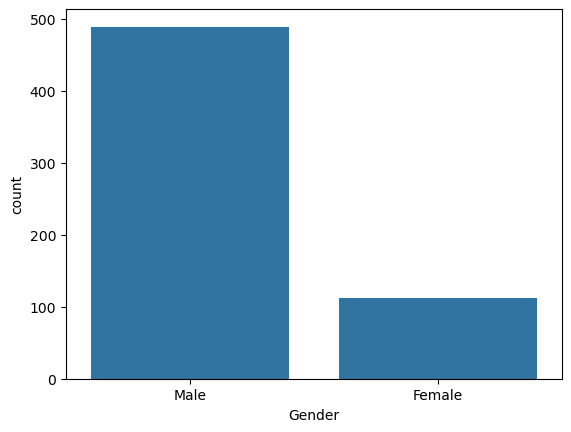

In [9]:
sns.countplot(x='Gender',data=df_train)

<Axes: xlabel='Education', ylabel='count'>

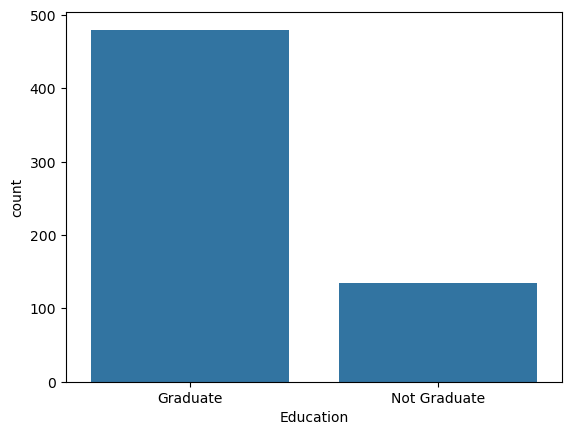

In [10]:
sns.countplot(x='Education',data=df_train)

<Axes: xlabel='Self_Employed', ylabel='count'>

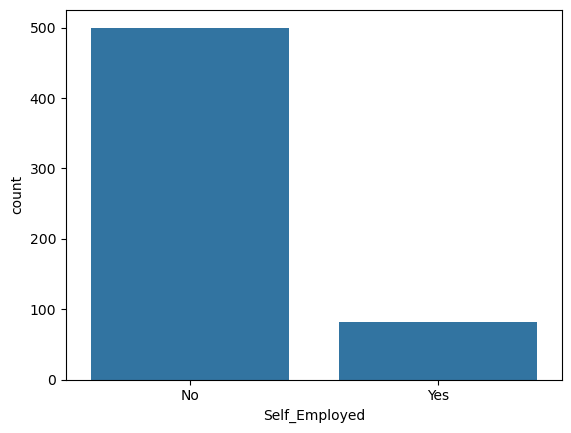

In [11]:
sns.countplot(x='Self_Employed',data=df_train)

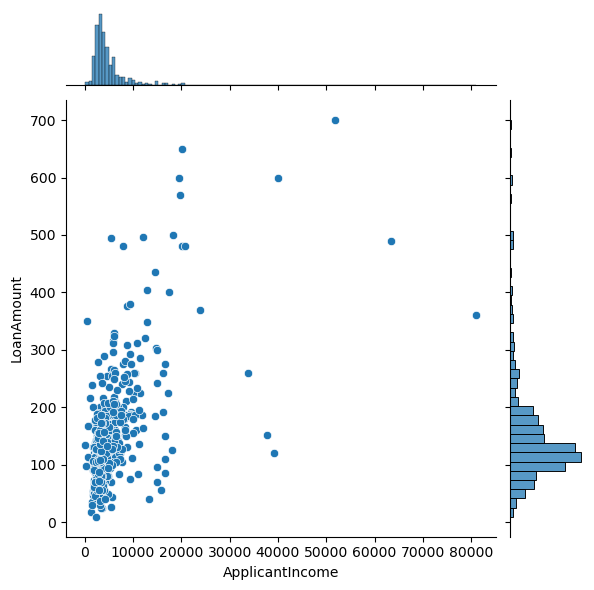

In [12]:
sns.jointplot(x=df_train['ApplicantIncome'],y=df_train['LoanAmount'])

<Axes: >

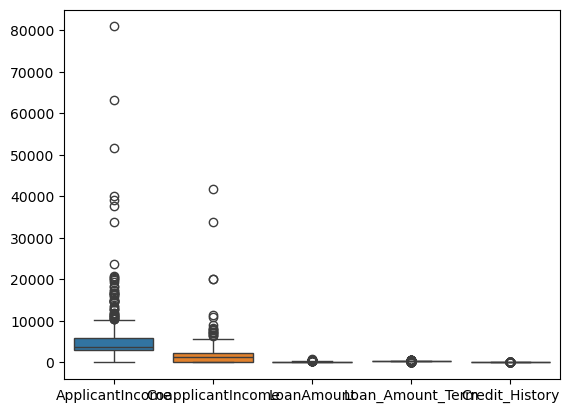

In [13]:
sns.boxplot(df_train)

<Axes: >

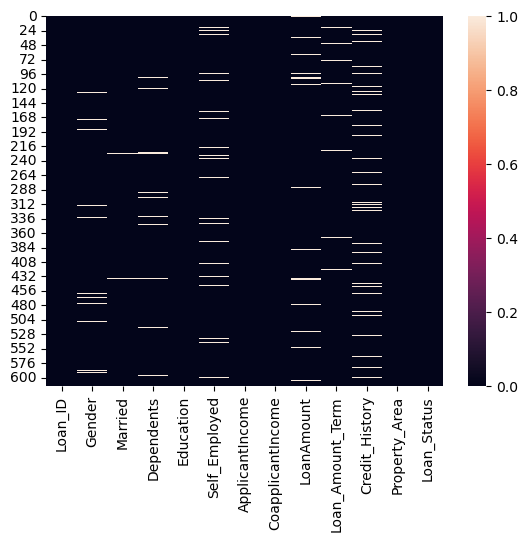

In [14]:
sns.heatmap(df_train.isnull())

In [15]:
df_train=df_train.dropna()

In [16]:
df_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


<Axes: >

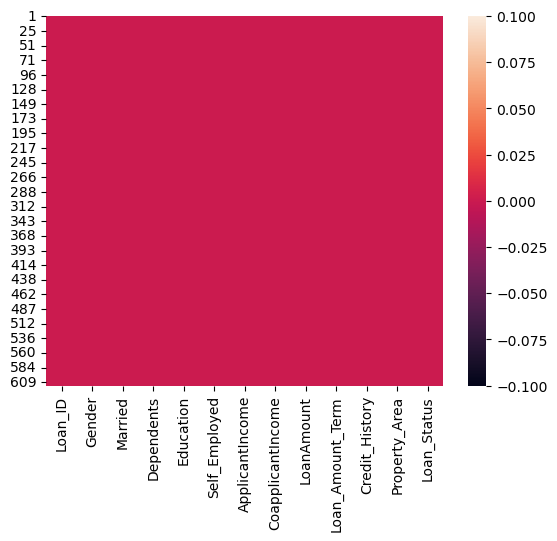

In [17]:
sns.heatmap(df_train.isnull())

In [18]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
df_train['Gender']=lb.fit_transform(df_train['Gender'])
df_train['Married']=lb.fit_transform(df_train['Married'])
df_train['Education']=lb.fit_transform(df_train['Education'])
df_train['Self_Employed']=lb.fit_transform(df_train['Self_Employed'])
df_train['Property_Area']=lb.fit_transform(df_train['Property_Area'])
df_train['Loan_Status']=lb.fit_transform(df_train['Loan_Status'])




/tmp/ipykernel_1497/168697496.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Gender']=lb.fit_transform(df_train['Gender'])
/tmp/ipykernel_1497/168697496.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Married']=lb.fit_transform(df_train['Married'])
/tmp/ipykernel_1497/168697496.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

In [19]:
df_train.head(20)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1
6,LP001013,1,1,0,1,0,2333,1516.0,95.0,360.0,1.0,2,1
7,LP001014,1,1,3+,0,0,3036,2504.0,158.0,360.0,0.0,1,0
8,LP001018,1,1,2,0,0,4006,1526.0,168.0,360.0,1.0,2,1
9,LP001020,1,1,1,0,0,12841,10968.0,349.0,360.0,1.0,1,0
10,LP001024,1,1,2,0,0,3200,700.0,70.0,360.0,1.0,2,1


In [20]:
df_train['LoanAmount']=df_train['LoanAmount'].apply(np.int64)
df_train['CoapplicantIncome']=df_train['CoapplicantIncome'].apply(np.int64)
df_train['Loan_Amount_Term']=df_train['Loan_Amount_Term'].apply(np.int64)
df_train['Credit_History']=df_train['Credit_History'].apply(np.int64)

/tmp/ipykernel_1497/3839406.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['LoanAmount']=df_train['LoanAmount'].apply(np.int64)
/tmp/ipykernel_1497/3839406.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['CoapplicantIncome']=df_train['CoapplicantIncome'].apply(np.int64)
/tmp/ipykernel_1497/3839406.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

In [21]:
df_train.head(20)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,0,0,4583,1508,128,360,1,0,0
2,LP001005,1,1,0,0,1,3000,0,66,360,1,2,1
3,LP001006,1,1,0,1,0,2583,2358,120,360,1,2,1
4,LP001008,1,0,0,0,0,6000,0,141,360,1,2,1
5,LP001011,1,1,2,0,1,5417,4196,267,360,1,2,1
6,LP001013,1,1,0,1,0,2333,1516,95,360,1,2,1
7,LP001014,1,1,3+,0,0,3036,2504,158,360,0,1,0
8,LP001018,1,1,2,0,0,4006,1526,168,360,1,2,1
9,LP001020,1,1,1,0,0,12841,10968,349,360,1,1,0
10,LP001024,1,1,2,0,0,3200,700,70,360,1,2,1


In [22]:
df_train=df_train.drop(['Dependents'], axis=1)

In [23]:
df_train=df_train.drop(['Loan_ID'], axis=1)

In [24]:
#from sklearn.preprocessing import StandardScaler
#scaler=StandardScaler()
#df_train=scaler.fit_transform(df_train)


In [25]:
#df_train.feature_names()

In [26]:
#df_train

In [27]:
#df_train=pd.DataFrame(df_train, columns=['Gender','Married','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area','Loan_Status'])

<Axes: >

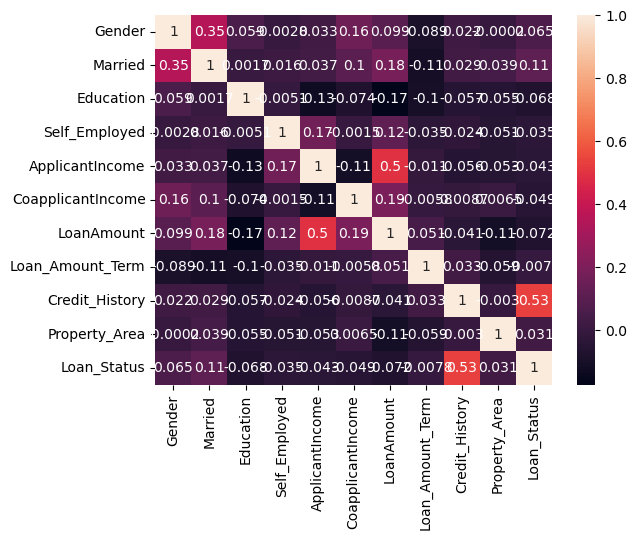

In [28]:
sns.heatmap(df_train.corr(),annot=True)

In [29]:
df_train.corr()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.349424,0.059245,-0.002761,0.032644,0.156170,0.098975,-0.088704,0.022447,-0.000204,0.064504
Married,0.349424,1.000000,0.001652,0.015674,0.036717,0.102950,0.183442,-0.107504,0.029095,0.038653,0.112321
Education,0.059245,0.001652,1.000000,-0.005085,-0.131172,-0.074498,-0.172780,-0.102168,-0.056656,-0.055005,-0.068437
Self_Employed,-0.002761,0.015674,-0.005085,1.000000,0.170785,-0.001508,0.120389,-0.034852,-0.023568,-0.050797,-0.034715
ApplicantIncome,0.032644,0.036717,-0.131172,0.170785,1.000000,-0.112588,0.495310,-0.010838,-0.056152,-0.053160,-0.043152
CoapplicantIncome,0.156170,0.102950,-0.074498,-0.001508,-0.112588,1.000000,0.190740,-0.005773,-0.008692,0.006539,-0.049020
LoanAmount,0.098975,0.183442,-0.172780,0.120389,0.495310,0.190740,1.000000,0.050867,-0.040773,-0.109685,-0.071753
Loan_Amount_Term,-0.088704,-0.107504,-0.102168,-0.034852,-0.010838,-0.005773,0.050867,1.000000,0.032937,-0.058656,-0.007798
Credit_History,0.022447,0.029095,-0.056656,-0.023568,-0.056152,-0.008692,-0.040773,0.032937,1.000000,-0.003013,0.529390
Property_Area,-0.000204,0.038653,-0.055005,-0.050797,-0.053160,0.006539,-0.109685,-0.058656,-0.003013,1.000000,0.031361


In [30]:
df_train=df_train.drop(['Loan_Amount_Term','Gender','Education'], axis=1)


In [31]:
df_train=df_train.drop(['Married'], axis=1)

In [32]:
df_train.head(50)

,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status
1,0,4583,1508,128,1,0,0
2,1,3000,0,66,1,2,1
3,0,2583,2358,120,1,2,1
4,0,6000,0,141,1,2,1
5,1,5417,4196,267,1,2,1
6,0,2333,1516,95,1,2,1
7,0,3036,2504,158,0,1,0
8,0,4006,1526,168,1,2,1
9,0,12841,10968,349,1,1,0
10,0,3200,700,70,1,2,1


In [33]:
X=df_train.drop('Loan_Status',axis=1)
y=df_train['Loan_Status']

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_test,X_train,y_test,y_train = train_test_split(X,y,test_size =0.3,random_state=101)

In [36]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier(criterion='gini')
tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [37]:
pred= tree.predict(X_test)

In [38]:
from sklearn.metrics import classification_report, accuracy_score


print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.48      0.64      0.55       104
           1       0.81      0.69      0.75       232

    accuracy                           0.68       336
   macro avg       0.65      0.67      0.65       336
weighted avg       0.71      0.68      0.69       336



In [39]:
score=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2,2.1,2.2,2.3,2.4,2.5]
list=[]
from sklearn.svm import SVC
for i in score:
 svc=SVC( C=i, kernel='poly')
 svc.fit(X_train,y_train)
 pred1= svc.predict(X_test)
 list.append(accuracy_score(y_test,pred1))

In [40]:
print(sorted(list))

[0.6904761904761905, 0.6904761904761905, 0.6904761904761905, 0.6904761904761905, 0.6904761904761905, 0.6934523809523809, 0.6934523809523809, 0.6934523809523809, 0.6934523809523809, 0.6934523809523809, 0.6934523809523809, 0.6934523809523809, 0.6934523809523809, 0.6934523809523809, 0.6934523809523809, 0.6934523809523809, 0.6934523809523809, 0.6934523809523809, 0.6964285714285714, 0.6964285714285714, 0.6964285714285714, 0.6964285714285714, 0.6964285714285714, 0.6964285714285714, 0.6964285714285714]


In [41]:
m=sorted(list)[-1]

In [42]:
pred1= svc.predict(X_test)

In [43]:
print(classification_report(y_test,pred1))

              precision    recall  f1-score   support

           0       0.56      0.05      0.09       104
           1       0.70      0.98      0.82       232

    accuracy                           0.69       336
   macro avg       0.63      0.52      0.45       336
weighted avg       0.65      0.69      0.59       336



In [44]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train,y_train)
pred2=rfc.predict(X_test)
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

           0       0.60      0.51      0.55       104
           1       0.79      0.85      0.82       232

    accuracy                           0.74       336
   macro avg       0.70      0.68      0.69       336
weighted avg       0.73      0.74      0.74       336



In [45]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
pred3=lr.predict(X_test)
print(classification_report(y_test,pred3))

              precision    recall  f1-score   support

           0       0.89      0.47      0.62       104
           1       0.80      0.97      0.88       232

    accuracy                           0.82       336
   macro avg       0.85      0.72      0.75       336
weighted avg       0.83      0.82      0.80       336



In [46]:
from sklearn.cluster import KMeans
clusterer= KMeans(n_clusters=2, init='k-means++')
clusterer.fit(X)
pred4 = clusterer.predict(X)

/opt/conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [47]:
clusterer.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

# **Thankyou**